In [1]:
import matplotlib.pyplot as plt
import math

In [2]:
x_init = 0
y_init = 0

v_x = 50
v_y= 50
angle = 45
g = 9.8

t_step = 0.1
t_max = 10

In [3]:
def x_t(t: float) -> float:
    return v_x * math.cos(math.radians(angle)) * t

In [4]:
def y_t(t: float) -> float:
    return v_y * math.sin(math.radians(angle)) * t - g * t**2 / 2

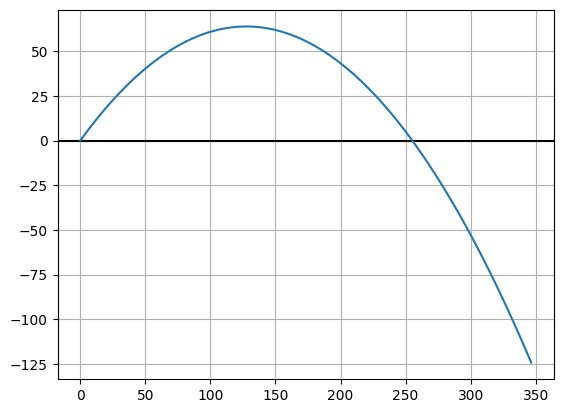

In [8]:
num_of_iter = int(t_max / t_step)

t_list = [i * t_step for i in range(num_of_iter)]
x_list = [x_init]
y_list = [y_init]

for i in range(num_of_iter - 1):
    x = x_t(t_list[i])
    y = y_t(t_list[i])

    x_list.append(x)
    y_list.append(y)

plt.axhline(y = 0, color = 'black', linestyle = '-')
plt.grid()
plt.plot(x_list, y_list)
plt.show()